<a href="https://colab.research.google.com/github/AbeMauriceVictorino/covid-19-Hawaii/blob/master/Copy_of_Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-19 Analysis - April 26, 2020**

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [0]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [0]:
df.shape

(3094, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


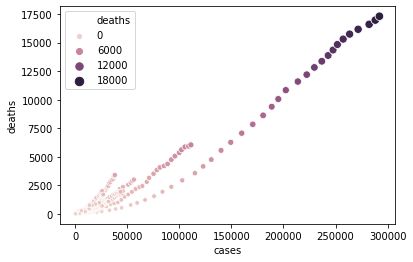

In [0]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-27', '2020-04-27', '2020-04-27', '2020-04-27',
               '2020-04-27', '2020-04-27', '2020-04-27', '2020-04-27',
               '2020-04-27', '2020-04-27'],
              dtype='datetime64[ns]', name='date', length=3094, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [0]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-28
Two days ago 2020-04-26


Display the top 10 rows of data or head(10), bottom rows is tail()

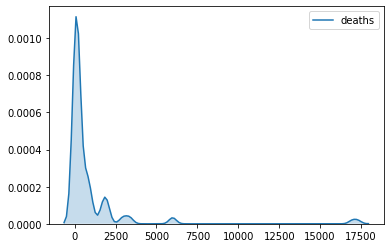

In [0]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

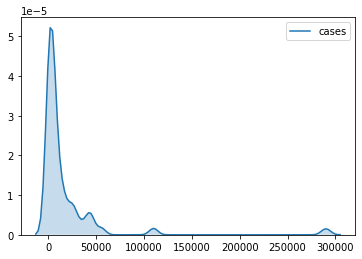

In [0]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [0]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-27,New York,36,292027,17303
2020-04-26,New York,36,288076,16966
2020-04-27,New Jersey,34,111188,6044
2020-04-26,New Jersey,34,109038,5938
2020-04-27,Michigan,26,38190,3406
2020-04-26,Michigan,26,37751,3314
2020-04-27,Massachusetts,25,56462,3003
2020-04-26,Massachusetts,25,54938,2899
2020-04-27,Connecticut,9,25997,2012


In [0]:
current_df.shape

(110, 4)

In [0]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Massachusetts',
 'Massachusetts',
 'Connecticut',
 'Illinois']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [0]:
set(top_states_df.state.values)

{'Connecticut',
 'Illinois',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

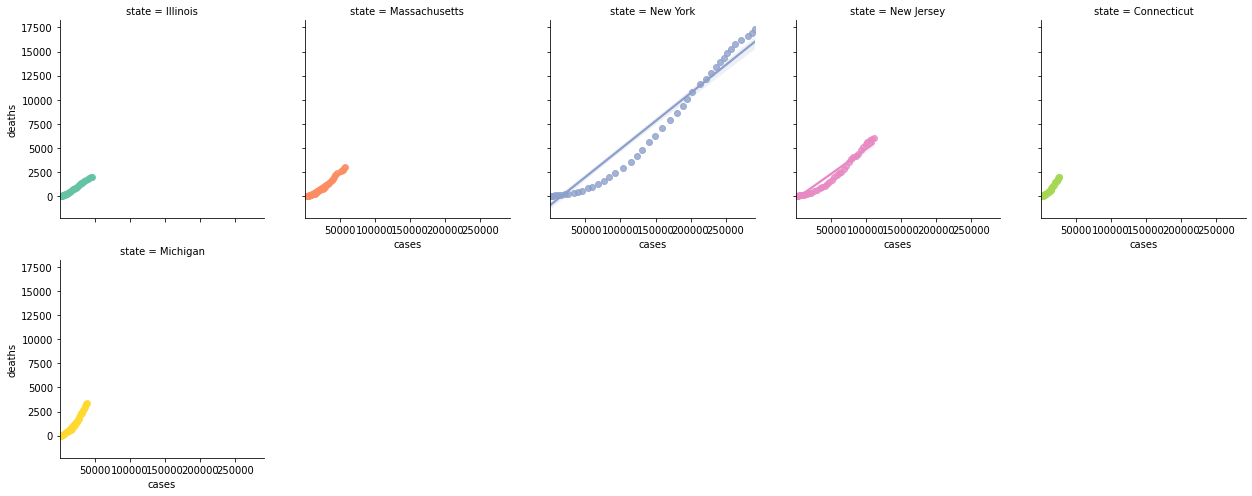

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
top_states_april_current_df = top_states_df.loc["2020-04-26":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(12)

,state,cases,deaths
date,,,
2020-04-27,New York,292027,17303
2020-04-26,New York,288076,16966
2020-04-27,New Jersey,111188,6044
2020-04-26,New Jersey,109038,5938
2020-04-27,Michigan,38190,3406
2020-04-26,Michigan,37751,3314
2020-04-27,Massachusetts,56462,3003
2020-04-26,Massachusetts,54938,2899
2020-04-27,Connecticut,25997,2012


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [0]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Original Code for ICS 360 HW - Import State Level Data for Hawaii from national dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(10)

,date,cases,deaths
2446,2020-04-16,535,9
2501,2020-04-17,547,9
2556,2020-04-18,568,9
2611,2020-04-19,574,10
2666,2020-04-20,578,10
2721,2020-04-21,580,12
2776,2020-04-22,586,12
2831,2020-04-23,590,12
2886,2020-04-24,595,13
2941,2020-04-25,597,14


Import County Level Data for Hawaii from county dataset

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(10)

,date,county,cases,deaths
87474,2020-04-25,Kauai,21,0
87475,2020-04-25,Maui,112,5
90291,2020-04-26,Hawaii,70,0
90292,2020-04-26,Honolulu,396,9
90293,2020-04-26,Kauai,21,0
90294,2020-04-26,Maui,112,5
93111,2020-04-27,Hawaii,70,0
93112,2020-04-27,Honolulu,396,11
93113,2020-04-27,Kauai,21,0
93114,2020-04-27,Maui,113,5


In [0]:
df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

In [0]:
df.shape

(209, 4)

Create a data frame for Maui County and display data for past 15 days

In [0]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(10)

,date,county,cases,deaths
67975,2020-04-18,Maui,104,3
70737,2020-04-19,Maui,106,4
73507,2020-04-20,Maui,108,4
76284,2020-04-21,Maui,110,5
79067,2020-04-22,Maui,110,5
81863,2020-04-23,Maui,112,5
84664,2020-04-24,Maui,113,5
87475,2020-04-25,Maui,112,5
90294,2020-04-26,Maui,112,5
93114,2020-04-27,Maui,113,5


Visualization of Cases on Maui County over time

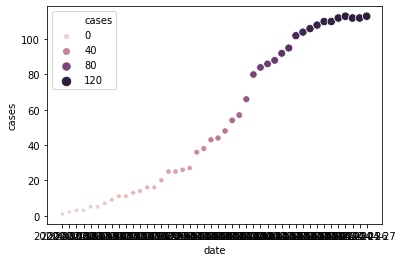

In [0]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Maui_County_df)

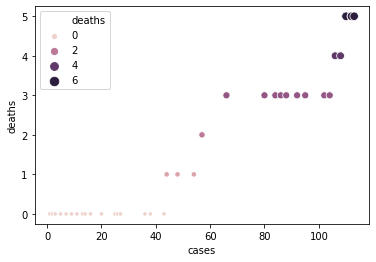

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

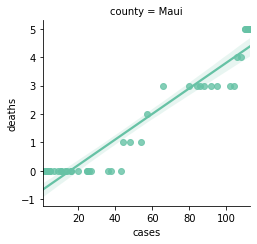

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [0]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail()

,date,county,cases,deaths
81861,2020-04-23,Honolulu,389,7
84662,2020-04-24,Honolulu,392,8
87473,2020-04-25,Honolulu,395,9
90292,2020-04-26,Honolulu,396,9
93112,2020-04-27,Honolulu,396,11


Visualization of Cases on Honolulu County over time

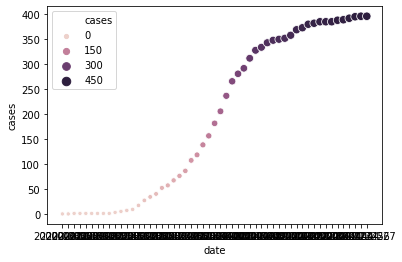

In [0]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Honolulu_County_df)

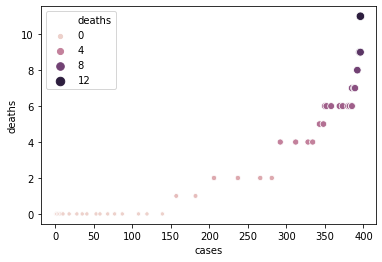

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

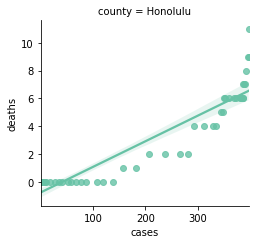

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

Analysis of Hawaii County

In [0]:
Hawaii_County_df = df[df["county"]== "Hawaii"]
Hawaii_County_df.tail(10)

,date,county,cases,deaths
67972,2020-04-18,Hawaii,61,0
70734,2020-04-19,Hawaii,62,0
73504,2020-04-20,Hawaii,64,0
76281,2020-04-21,Hawaii,64,0
79064,2020-04-22,Hawaii,67,0
81860,2020-04-23,Hawaii,68,0
84661,2020-04-24,Hawaii,69,0
87472,2020-04-25,Hawaii,69,0
90291,2020-04-26,Hawaii,70,0
93111,2020-04-27,Hawaii,70,0


Visualization of cases at Hawaii County over time

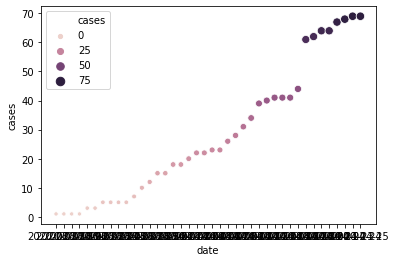

In [0]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Hawaii_County_df)